In [26]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
cd /data

/data


In [28]:
post_LTD2 = pd.read_pickle('ana_post_2Hz_reci')
post_LTD50 = pd.read_pickle('ana_post_50Hz_reci')
post_LTD50_uni = pd.read_pickle('ana_post_50Hz_uni')

In [29]:
post_LTD2

,Before,After,File name,elimi
121,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017081802,60
122,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082302,55
123,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082304,45
124,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082402,60
125,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017083001,45
126,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017083101,40


In [30]:
post_LTD50

,Before,After,File name,elimi
35,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rs': [...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032402,60
36,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032701,60
37,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032802,60
38,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032905,32
39,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053102,30


In [31]:
post_LTD50_uni

,Before,After,File name,elimi
30,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'rs...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032401,70
31,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032803,50
32,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062304,45
33,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062701,25
34,"{'x': [1, 2, 3, 4, 5, 6, 7, 8], 'rs': [[13.324...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017060803,50


/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


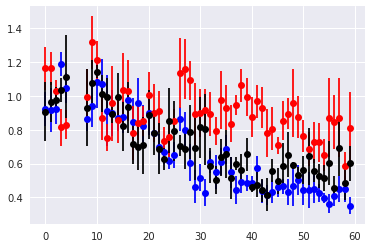

In [32]:
ave_ptl_resp = np.ones((len( post_LTD2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2 = patch_pip.samp_ave( post_LTD2, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(post_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(post_LTD50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(post_LTD50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni = patch_pip.samp_ave(post_LTD50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

[0, 60, 0.1, 1.7]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


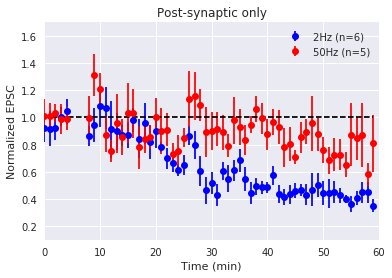

In [33]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(post_LTD2)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(post_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only')
plt.axis([0,60,0.1,1.7])

[0, 60, 0.1, 1.7]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


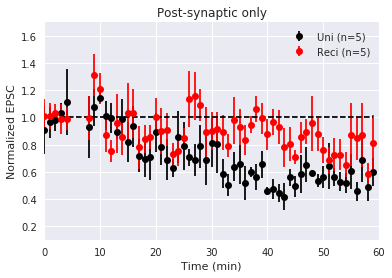

In [34]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ko', label='Uni (n={a})'.format(a=len(post_LTD50_uni)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(post_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only')
plt.axis([0,60,0.1,1.7])